<font face="黑体" size=4 color=#8B0000> HP 滤波 </font>

In [3]:
import numpy as np
import time

In [4]:
def HP_Filter(Y,factor):
    #Y is the original array,factor is the penalty factor
    #Y is a column vector, type is list/array
    n=len(Y)
    if (n<4):
        print("The number of the sample must bigger than 4")
        exit()
    else:
        F=np.zeros([n,n])
        for i in range(0,n):
            if (i==0):
                F[i][0]=1
                F[i][1]=-2
                F[i][2]=1
            elif (i==1):
                F[i][0]=-2
                F[i][1]=5
                F[i][2]=-4
                F[i][3]=1
            elif(1<i<n-2):
                F[i][i-2]=1
                F[i][i-1]=-4
                F[i][i]=6
                F[i][i+1]=-4
                F[i][i+2]=1
            elif(i==n-2):
                F[i][-1]=-2
                F[i][-2]=5
                F[i][-3]=-4
                F[i][-4]=1
            else:
                F[i][-1]=1
                F[i][-2]=-2
                F[i][-3]=1
        F=np.matrix(F)#transfer into matrix
        I=np.matrix(np.identity(n))#generate identity matrix
        M=I+factor*F
        Y=np.matrix(Y)
        G=np.linalg.inv(M)*(Y.T)
        C=Y.T-G
        G=np.array(G)
        C=np.array(C)
    return G,C

<font face="黑体" size=4 color=#8B0000> This is the ituation of the USA </font>

[]

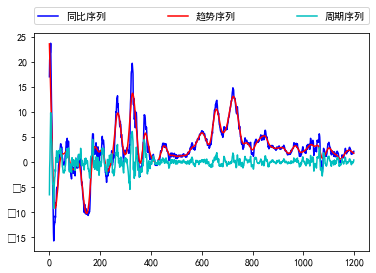

In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei'] # for the normal demonstration of chinese words
os.chdir('D:\各种材料\研究生\公众号\三、美林时钟模型')
data=pd.read_excel('美国CPI与生产指数同比较长时间.xlsx')
# to get CPI pic
CPI=data['CPI同比'].values.tolist()
[CPI_trend,CPI_circle]=HP_Filter(CPI,1600)
plt.plot(CPI,"b",label="同比序列")
plt.plot(CPI_trend,"r", label="趋势序列")
plt.plot(CPI_circle,"c",label="周期序列")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=0,ncol=3, mode="expand", borderaxespad=0.)
plt.plot()

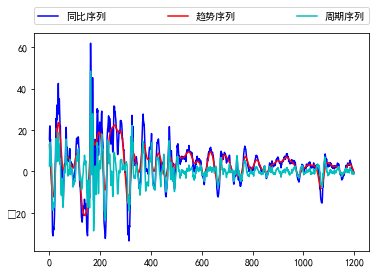

In [33]:
#to get production indexing pic
production=data['生产指数同比'].values.tolist()
[production_trend,production_circle]=HP_Filter(production,1600)
plt.plot(production,"b",label="同比序列")
plt.plot(production_trend,"r",label="趋势序列")
plt.plot(production_circle,"c",label="周期序列")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=0,ncol=3, mode="expand", borderaxespad=0.)
plt.show()

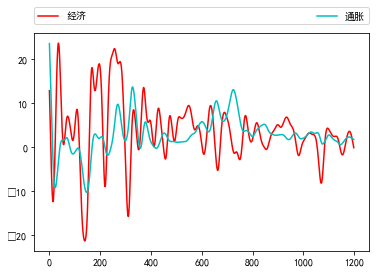

In [43]:
plt.plot(production_trend,"r",label="经济")
plt.plot(CPI_trend,"c",label="通胀")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=0,ncol=3, mode="expand", borderaxespad=0.)
plt.show()

In [57]:
writer=pd.ExcelWriter("美国经济通胀滤波.xlsx")
pro= pd.DataFrame(production_trend,index=data['日期'])
cpi= pd.DataFrame(CPI_trend,index=data['日期'])
result=pd.merge(pro, cpi,left_index=True,right_index=True)
result.columns=['经济同比趋势','CPI同比趋势']
result.to_excel(writer,'page_1',float_format='%.5f')
writer.save()

<font face="黑体" size=4 color=#8B0000> The folowing is the situation of China </font>

[]

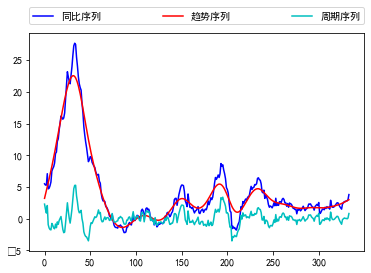

In [44]:
data_china=pd.read_excel('中国经济通胀同比.xlsx')
# to get CPI pic
CPI_china=data_china['CPI同比'].values.tolist()
[CPI_trend_china,CPI_circle_china]=HP_Filter(CPI_china,1600)
plt.plot(CPI_china,"b",label="同比序列")
plt.plot(CPI_trend_china,"r", label="趋势序列")
plt.plot(CPI_circle_china,"c",label="周期序列")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=0,ncol=3, mode="expand", borderaxespad=0.)
plt.plot()

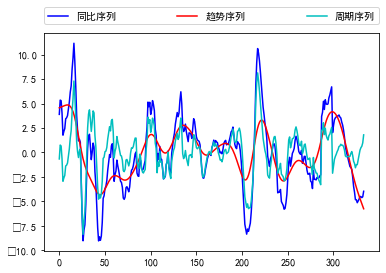

In [51]:
#to get production indexing pic
production_china=data_china['经济一致指数同比'].values.tolist()
[production_trend_china,production_circle_china]=HP_Filter(production_china,1600)
plt.plot(production_china,"b",label="同比序列")
plt.plot(production_trend_china,"r",label="趋势序列")
plt.plot(production_circle_china,"c",label="周期序列")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=0,ncol=3, mode="expand", borderaxespad=0.)
plt.show()

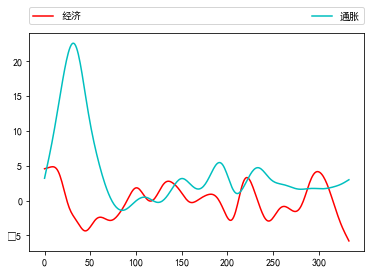

In [52]:
plt.plot(production_trend_china,"r",label="经济")
plt.plot(CPI_trend_china,"c",label="通胀")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=0,ncol=3, mode="expand", borderaxespad=0.)
plt.show()

In [56]:
writer=pd.ExcelWriter("中国经济通胀滤波.xlsx")
pro_china= pd.DataFrame(production_trend_china,index=data_china['日期'])
cpi_china= pd.DataFrame(CPI_trend_china,index=data_china['日期'])
result=pd.merge(pro_china, cpi_china,left_index=True,right_index=True)
result.columns=['经济同比趋势','CPI同比趋势']
result.to_excel(writer,'page_1',float_format='%.5f')
writer.save()